In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import os

folder_path = '/content/drive/MyDrive/di_bootcamp_resources/week_7/Flower Color Images Dataset'
if os.path.exists(folder_path):
  print(f"Contents of {folder_path}:")
  for item in os.listdir(folder_path):
    print(item)
else:
  print(f"Folder not found: {folder_path}")

Contents of /content/drive/MyDrive/di_bootcamp_resources/week_7/Flower Color Images Dataset:
FlowerColorImages.h5
flowers
flower_images


In [8]:
import h5py
import os

file_path = '/content/drive/MyDrive/di_bootcamp_resources/week_7/Flower Color Images Dataset/FlowerColorImages.h5'

if os.path.exists(file_path):
    try:
        with h5py.File(file_path, 'r') as f:
            print("Keys in the HDF5 file:")
            for key in f.keys():
                print(key)
            # You can further explore specific keys, e.g., print attributes or shape
            # for key in f.keys():
            #     print(f"\nExploring key: {key}")
            #     if isinstance(f[key], h5py.Group):
            #         print("  Type: Group")
            #         print("  Members:")
            #         for member_key in f[key].keys():
            #             print(f"    - {member_key}")
            #     elif isinstance(f[key], h5py.Dataset):
            #         print("  Type: Dataset")
            #         print(f"  Shape: {f[key].shape}")
            #         print(f"  Dtype: {f[key].dtype}")

    except Exception as e:
        print(f"Error opening or reading HDF5 file: {e}")
else:
    print(f"File not found: {file_path}")

Keys in the HDF5 file:
images
labels


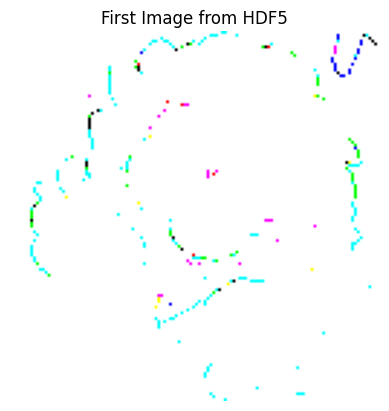

Successfully loaded and displayed the first image.


In [11]:
import h5py
import os
import matplotlib.pyplot as plt

file_path = '/content/drive/MyDrive/di_bootcamp_resources/week_7/Flower Color Images Dataset/FlowerColorImages.h5'

if os.path.exists(file_path):
    try:
        with h5py.File(file_path, 'r') as f:
            if 'images' in f:
                images_dataset = f['images']
                if images_dataset.shape[0] > 0:
                    # Load the first image
                    first_image = images_dataset[0]

                    # Display the image
                    plt.imshow(first_image)
                    plt.axis('off')
                    plt.title("First Image from HDF5")
                    plt.show()

                    print("Successfully loaded and displayed the first image.")
                else:
                    print("The 'images' dataset is empty.")
            else:
                print("The 'images' key was not found in the HDF5 file.")

    except Exception as e:
        print(f"Error opening or reading HDF5 file: {e}")
else:
    print(f"File not found: {file_path}")

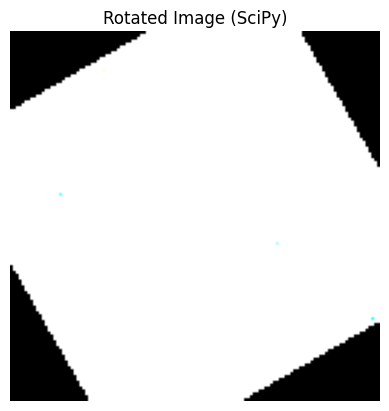

Successfully rotated and displayed the image using SciPy.


In [14]:
from scipy.ndimage import rotate
import numpy as np

def rotate_image_30_degrees(image):
  """Rotates an image by 30 degrees using scipy.ndimage.rotate."""
  # The parameters for rotate are: input array, angle, axes, reshape, order, mode, cval, prefilter
  # We need the image array and the angle.
  # axes=(0, 1) specifies rotation in the first two dimensions (height and width).
  # reshape=False prevents changing the output shape, keeping it the same as the input.
  # order=1 uses bilinear interpolation for rotation.
  rotated_image = rotate(image, 30, axes=(0, 1), reshape=False, order=1)
  return rotated_image

# Assuming 'first_image' from a previous cell is available as a numpy array
# If your image is a PIL Image, convert it to a numpy array first:
# image_np = np.array(img_pil)

if 'first_image' in locals() and isinstance(first_image, np.ndarray):
    rotated_image_scipy = rotate_image_30_degrees(first_image)

    # Display the rotated image using matplotlib
    import matplotlib.pyplot as plt
    plt.imshow(rotated_image_scipy)
    plt.axis('off')
    plt.title("Rotated Image (SciPy)")
    plt.show()
    print("Successfully rotated and displayed the image using SciPy.")
elif 'first_image' not in locals():
    print("The 'first_image' variable was not found. Please load an image first.")
else:
    print("The 'first_image' variable is not a numpy array.")

/tmp/ipython-input-1261698591.py:15: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  img_pil = Image.fromarray((first_image * 255).astype(np.uint8), 'RGB')


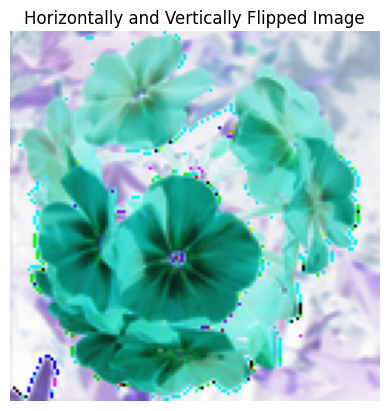

Successfully flipped the image horizontally and then vertically.


In [15]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'first_image' from a previous cell is available as a numpy array
# If not, you might need to reload it or adjust this code

if 'first_image' in locals() and isinstance(first_image, np.ndarray):
    # Convert the numpy array to a Pillow Image object
    # Check the data type and range to handle potential scaling issues
    if first_image.dtype == np.uint8:
        img_pil = Image.fromarray(first_image, 'RGB')
    else:
        # If the data is not uint8, assume it's float and scale to 0-255
        img_pil = Image.fromarray((first_image * 255).astype(np.uint8), 'RGB')

    # Flip horizontally using ImageOps.mirror()
    horizontally_flipped_img = ImageOps.mirror(img_pil)

    # Flip vertically using ImageOps.flip() on the horizontally flipped image
    vertically_and_horizontally_flipped_img = ImageOps.flip(horizontally_flipped_img)

    # Convert the final Pillow Image back to a numpy array for displaying with matplotlib
    flipped_image_np = np.array(vertically_and_horizontally_flipped_img)

    # Display the flipped image
    plt.imshow(flipped_image_np)
    plt.axis('off')
    plt.title("Horizontally and Vertically Flipped Image")
    plt.show()

    print("Successfully flipped the image horizontally and then vertically.")
else:
    print("The 'first_image' variable was not found or is not a numpy array. Please load an image first.")

/tmp/ipython-input-2081238099.py:15: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  img_pil = Image.fromarray((first_image * 255).astype(np.uint8), 'RGB')


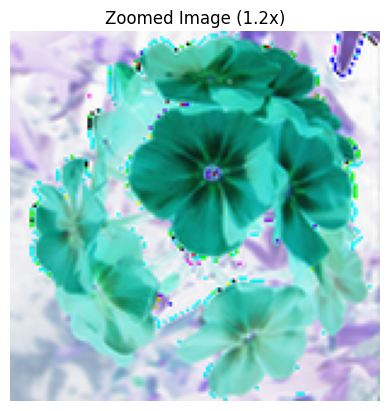

Successfully zoomed in on the image by 1.2x.


In [16]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'first_image' from a previous cell is available as a numpy array
# If not, you might need to reload it or adjust this code

if 'first_image' in locals() and isinstance(first_image, np.ndarray):
    # Convert the numpy array to a Pillow Image object
    # Check the data type and range to handle potential scaling issues
    if first_image.dtype == np.uint8:
        img_pil = Image.fromarray(first_image, 'RGB')
    else:
        # If the data is not uint8, assume it's float and scale to 0-255
        img_pil = Image.fromarray((first_image * 255).astype(np.uint8), 'RGB')

    # Get current dimensions
    width, height = img_pil.size

    # Calculate new dimensions for 1.2x zoom
    new_width = int(width * 1.2)
    new_height = int(height * 1.2)

    # Resize the image using the new dimensions. Image.LANCZOS is a good resampling filter for zooming.
    zoomed_img_pil = img_pil.resize((new_width, new_height), Image.Resampling.LANCZOS)

    # Convert the zoomed Pillow Image back to a numpy array for displaying with matplotlib
    zoomed_image_np = np.array(zoomed_img_pil)

    # Display the zoomed image
    plt.imshow(zoomed_image_np)
    plt.axis('off')
    plt.title("Zoomed Image (1.2x)")
    plt.show()

    print("Successfully zoomed in on the image by 1.2x.")
else:
    print("The 'first_image' variable was not found or is not a numpy array. Please load an image first.")